## importing basic libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## loading the data

In [2]:
data=pd.read_csv(r"E:\Data science materials\Real_world_projects\customer_segmentation\data.csv",
                 encoding= 'unicode_escape')

In [3]:
df=data.copy()

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data cleaning

In [5]:
# checking the missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

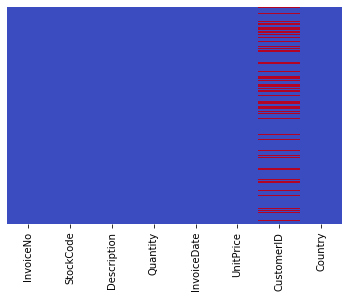

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='coolwarm',cbar=False)

In [7]:
# dropping the missing values of customerId
df=df.dropna(subset='CustomerID')

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.shape

(406829, 8)

In [10]:
# checking the duplicaed data
df.loc[df.duplicated(),:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [11]:
# checking the unique values
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [12]:
# we need to drop the duplicated rows
df=df.drop_duplicates(ignore_index=True)

In [13]:
df.shape

(401604, 8)

In [14]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [15]:
df.iloc[155:165,:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
155,536384,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,12/1/2010 9:53,6.45,18074.0,United Kingdom
156,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,12/1/2010 9:53,0.65,18074.0,United Kingdom
157,536384,22464,HANGING METAL HEART LANTERN,12,12/1/2010 9:53,1.65,18074.0,United Kingdom
158,536384,21324,HANGING MEDINA LANTERN SMALL,6,12/1/2010 9:53,2.95,18074.0,United Kingdom
159,536384,22457,NATURAL SLATE HEART CHALKBOARD,12,12/1/2010 9:53,2.95,18074.0,United Kingdom
160,536384,22469,HEART OF WICKER SMALL,40,12/1/2010 9:53,1.45,18074.0,United Kingdom
161,536384,22470,HEART OF WICKER LARGE,40,12/1/2010 9:53,2.55,18074.0,United Kingdom
162,536384,22224,WHITE LOVEBIRD LANTERN,6,12/1/2010 9:53,2.95,18074.0,United Kingdom
163,536384,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,2,12/1/2010 9:53,12.75,18074.0,United Kingdom
164,536384,22189,CREAM HEART CARD HOLDER,4,12/1/2010 9:53,3.95,18074.0,United Kingdom


# Data visualisation

In [16]:
df['Total_value']=df['Quantity']*df['UnitPrice']

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
 8   Total_value  401604 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 27.6+ MB


In [19]:
stock_code=df['StockCode'].value_counts()

In [20]:
stock_code

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: StockCode, Length: 3684, dtype: int64

## top 10 stockCode that generate most value

<AxesSubplot:>

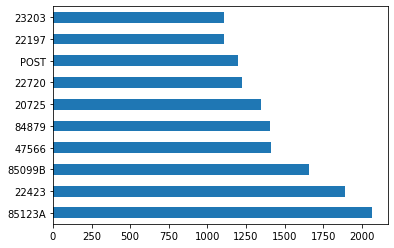

In [21]:
stock_code[:10].plot(kind='barh')

In [22]:
df['month']=pd.to_datetime(df['InvoiceDate']).dt.month_name()

## Month in which purchasing is most

<AxesSubplot:>

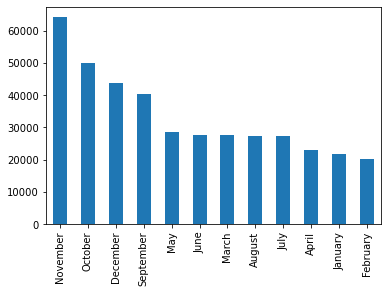

In [23]:
df['month'].value_counts().plot.bar()

In [24]:
# Top 10 customers
customer_value=df.groupby('CustomerID')['Total_value'].sum().sort_values(ascending=False).reset_index()

In [25]:
customer_value

,CustomerID,Total_value
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187322.17
3,14911.0,132458.73
4,12415.0,123725.45
...,...,...
4367,12503.0,-1126.00
4368,17603.0,-1165.30
4369,14213.0,-1192.20
4370,15369.0,-1592.49


In [26]:
customer_id=customer_value['CustomerID'][:10]

In [27]:
value=customer_value['Total_value'][:10]

## Top 10 high valued customer

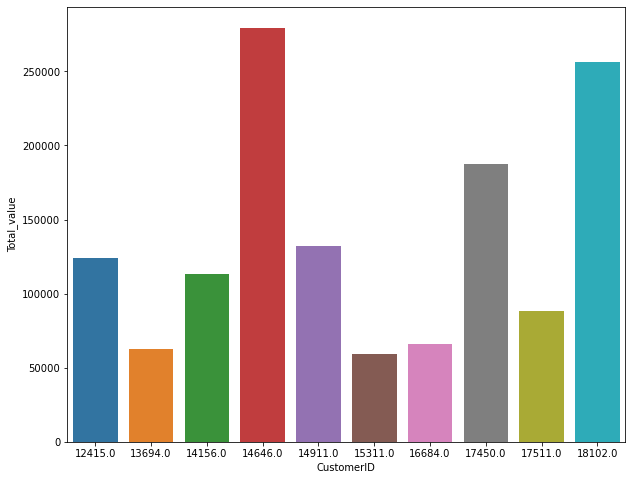

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(x=customer_id,y=value)
plt.show()

In [29]:
countries_index=df['Country'].value_counts().index

In [30]:
countries_index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain', 'Netherlands',
       'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy',
       'Channel Islands', 'Finland', 'Cyprus', 'Sweden', 'Austria', 'Denmark',
       'Japan', 'Poland', 'USA', 'Israel', 'Unspecified', 'Singapore',
       'Iceland', 'Canada', 'Greece', 'Malta', 'United Arab Emirates',
       'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil',
       'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object')

In [31]:
countries=df['Country'].value_counts()

## Top 5 country that generate most value

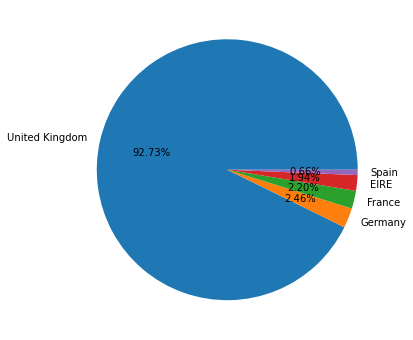

In [83]:
plt.figure(figsize=(6,6))
plt.pie(countries[:5],labels=countries_index[:5],autopct='%1.2f%%')
plt.show()

# Monetary

In [33]:
monetary_table=df.groupby('CustomerID').agg({'Total_value':lambda x:x.sum()})

In [34]:
monetary_table.head()

,Total_value
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [35]:
monetary_table=monetary_table.reset_index()

In [36]:
monetary_table.head(10)

,CustomerID,Total_value
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,1545.41
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


# EDA part

In [37]:
monetary_table.describe()

,CustomerID,Total_value
count,4372.000000,4372.000000
mean,15299.677722,1893.531433
std,1722.390705,8218.696204
min,12346.000000,-4287.630000
25%,13812.750000,291.795000
50%,15300.500000,644.070000
75%,16778.250000,1608.335000
max,18287.000000,279489.020000


In [38]:
# split the data into four segment
quantiles=monetary_table.quantile([0.25,0.50,0.75])

In [39]:
# create a function to define Monetart segment
def Mscoring(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [40]:
monetary_table['M']=monetary_table['Total_value'].apply(Mscoring,args=('Total_value',quantiles))

In [41]:
monetary_table.head()

,CustomerID,Total_value,M
0,12346.0,0.00,4
1,12347.0,4310.00,1
2,12348.0,1797.24,1
3,12349.0,1757.55,1
4,12350.0,334.40,3


In [42]:
monetary_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4372 non-null   float64
 1   Total_value  4372 non-null   float64
 2   M            4372 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 102.6 KB


In [43]:
# Assign Loyalty level to each customer
loyalty_level=['Diamond','Platinum','Gold','Silver']
scores=pd.qcut(monetary_table.M,q=4,labels=loyalty_level)
monetary_table['Loyalty_levels']=scores.values

In [44]:
monetary_table.head(10)

,CustomerID,Total_value,M,Loyalty_levels
0,12346.0,0.00,4,Silver
1,12347.0,4310.00,1,Diamond
2,12348.0,1797.24,1,Diamond
3,12349.0,1757.55,1,Diamond
4,12350.0,334.40,3,Gold
5,12352.0,1545.41,2,Platinum
6,12353.0,89.00,4,Silver
7,12354.0,1079.40,2,Platinum
8,12355.0,459.40,3,Gold
9,12356.0,2811.43,1,Diamond


## customer belonging to diamond class

In [45]:
monetary_table[monetary_table['M']==1].sort_values('Total_value',
                                                    ascending=False).head(10)

,CustomerID,Total_value,M,Loyalty_levels
1703,14646.0,279489.02,1,Diamond
4233,18102.0,256438.49,1,Diamond
3758,17450.0,187322.17,1,Diamond
1895,14911.0,132458.73,1,Diamond
55,12415.0,123725.45,1,Diamond
1345,14156.0,113214.59,1,Diamond
3801,17511.0,88125.38,1,Diamond
3202,16684.0,65892.08,1,Diamond
1005,13694.0,62690.54,1,Diamond
2192,15311.0,59284.19,1,Diamond


In [46]:
monetary_table.columns

Index(['CustomerID', 'Total_value', 'M', 'Loyalty_levels'], dtype='object')

In [47]:
#Handling negative value
def hand_neg_val(num):
    if num<=0:
        return 1
    else:
        return num

In [48]:
monetary_table['Total_value']=[hand_neg_val(x) for x in monetary_table.Total_value]

In [49]:
monetary_table.describe()

,CustomerID,Total_value,M
count,4372.000000,4.372000e+03,4372.000000
mean,15299.677722,1.896569e+03,2.500000
std,1722.390705,8.217626e+03,1.118162
min,12346.000000,7.105427e-15,1.000000
25%,13812.750000,2.917950e+02,1.750000
50%,15300.500000,6.440700e+02,2.500000
75%,16778.250000,1.608335e+03,3.250000
max,18287.000000,2.794890e+05,4.000000


In [50]:
# perform Log transform to bring data into normal or near normal distribution
Log_TFd_data=monetary_table[['Total_value']].apply(np.log,axis=1).round(3)

In [51]:
Log_TFd_data.head()

,Total_value
0,0.000
1,8.369
2,7.494
3,7.472
4,5.812


In [52]:
new_data=Log_TFd_data

In [53]:
new_data.head()

,Total_value
0,0.000
1,8.369
2,7.494
3,7.472
4,5.812


# feature scaling

<AxesSubplot:ylabel='Total_value'>

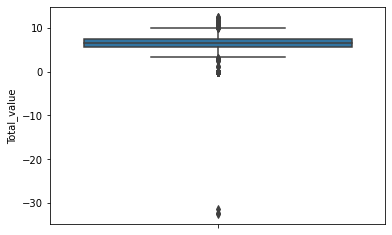

In [54]:
sns.boxplot(y='Total_value',data=new_data)

In [55]:
from sklearn.preprocessing import StandardScaler
scale_object=StandardScaler()
scaled_data=scale_object.fit_transform(new_data)
scaled_data

array([[-3.69091748],
       [ 1.09059387],
       [ 0.59067483],
       ...,
       [-0.73482479],
       [ 0.66437718],
       [ 0.60324422]])

In [56]:
scaled_data=pd.DataFrame(scaled_data,index=monetary_table.index,columns=new_data.columns)

In [57]:
scaled_data.head()

,Total_value
0,-3.690917
1,1.090594
2,0.590675
3,0.578105
4,-0.370312


# Build clustering Model

In [58]:
from sklearn.cluster import KMeans

sum_of_sq_dist={}

for k in range(1,15):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=300)
    km=km.fit(scaled_data)
    sum_of_sq_dist[k]=km.inertia_

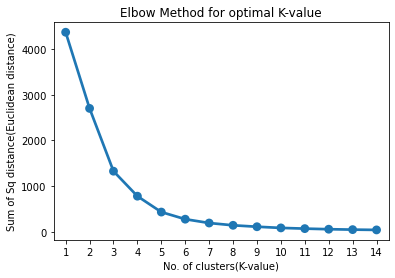

In [59]:
# visualisation for elbow method

sns.pointplot(x=list(sum_of_sq_dist.keys()),y=list(sum_of_sq_dist.values()))
plt.xlabel("No. of clusters(K-value)")
plt.ylabel("Sum of Sq distance(Euclidean distance)")
plt.title("Elbow Method for optimal K-value")
plt.show()

In [60]:
km=KMeans(n_clusters=4,init='k-means++',max_iter=300)
km=km.fit(scaled_data)

In [61]:
y_kmeans=km.predict(scaled_data)

In [62]:
y_kmeans

array([3, 0, 0, ..., 1, 0, 0])

In [63]:
monetary_table['Cluster']=km.labels_

In [64]:
monetary_table.head()

,CustomerID,Total_value,M,Loyalty_levels,Cluster
0,12346.0,1.00,4,Silver,3
1,12347.0,4310.00,1,Diamond,0
2,12348.0,1797.24,1,Diamond,0
3,12349.0,1757.55,1,Diamond,0
4,12350.0,334.40,3,Gold,1


In [65]:
monetary_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CustomerID      4372 non-null   float64 
 1   Total_value     4372 non-null   float64 
 2   M               4372 non-null   int64   
 3   Loyalty_levels  4372 non-null   category
 4   Cluster         4372 non-null   int32   
dtypes: category(1), float64(2), int32(1), int64(1)
memory usage: 124.1 KB


In [66]:
# look at the centroid per cluster

centroid_df=monetary_table.groupby('Loyalty_levels')[['CustomerID','Total_value']].agg({'CustomerID':'nunique'
                                                ,'Total_value':'mean'})   

In [67]:
centroid_df

,CustomerID,Total_value
Loyalty_levels,,
Diamond,1093,5954.807339
Platinum,1093,1026.334521
Gold,1093,443.108922
Silver,1093,162.026038


In [68]:
# look at the centroid per cluster
centroid_df=monetary_table.groupby('Cluster')[['CustomerID','Total_value']].agg({'CustomerID':'nunique'
                                                ,'Total_value':'mean'}).reset_index()

In [69]:
centroid_df

,Cluster,CustomerID,Total_value
0,0,1854,3.986028e+03
1,1,2456,3.670891e+02
2,2,3,1.421085e-14
3,3,59,2.261017e+00


In [70]:
centroid_df=centroid_df.rename(columns={'CustomerID':'Num_of_Buyers'})

In [71]:
centroid_df['Percent']=round(centroid_df['Num_of_Buyers']/centroid_df.Num_of_Buyers.sum()*100,2)

In [72]:
centroid_df

,Cluster,Num_of_Buyers,Total_value,Percent
0,0,1854,3.986028e+03,42.41
1,1,2456,3.670891e+02,56.18
2,2,3,1.421085e-14,0.07
3,3,59,2.261017e+00,1.35


In [73]:
centroid_df_1 = monetary_table.groupby('Loyalty_levels')[['Total_value','CustomerID']].agg({ 'Total_value':'sum','CustomerID':'nunique'}).reset_index()
centroid_df_1 = centroid_df_1.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df_1

,Loyalty_levels,Total_value,NumBuyers
0,Diamond,6508604.421,1093
1,Platinum,1121783.631,1093
2,Gold,484318.052,1093
3,Silver,177094.460,1093


In [74]:
centroid_df_1['Percent'] = round(centroid_df_1['NumBuyers']/centroid_df_1.NumBuyers.sum()*100,2)
centroid_df_1

,Loyalty_levels,Total_value,NumBuyers,Percent
0,Diamond,6508604.421,1093,25.0
1,Platinum,1121783.631,1093,25.0
2,Gold,484318.052,1093,25.0
3,Silver,177094.460,1093,25.0


In [75]:
!pip install squarify
import squarify

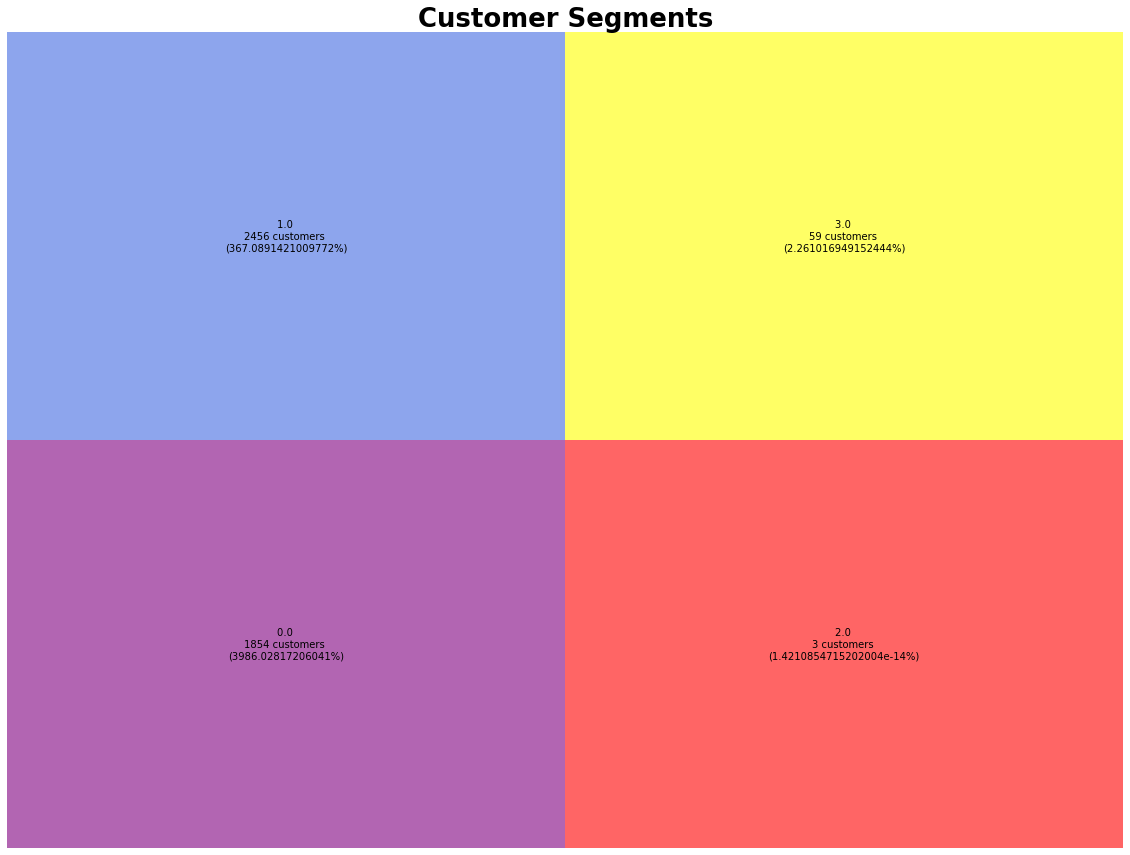

In [76]:
# Based on Cluster
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dict ={'0': 'Purple','1':'royalblue','2':'red','3':'yellow'}

squarify.plot(sizes=centroid_df_1['NumBuyers'],
             color=colors_dict.values(),
             label=['{} \n{:.0f} customers \n({}%)'.format(*centroid_df.iloc[i])
             for i in range (0,len(centroid_df_1))], alpha=0.6)

plt.title("Customer Segments", fontsize=26, fontweight="bold")
plt.axis("off")

plt.show()

In [77]:
monetary_table.head(20)

,CustomerID,Total_value,M,Loyalty_levels,Cluster
0,12346.0,1.00,4,Silver,3
1,12347.0,4310.00,1,Diamond,0
2,12348.0,1797.24,1,Diamond,0
3,12349.0,1757.55,1,Diamond,0
4,12350.0,334.40,3,Gold,1
5,12352.0,1545.41,2,Platinum,0
6,12353.0,89.00,4,Silver,1
7,12354.0,1079.40,2,Platinum,0
8,12355.0,459.40,3,Gold,1
9,12356.0,2811.43,1,Diamond,0


In [78]:
monetary_table.iloc[4230:4240,:]

,CustomerID,Total_value,M,Loyalty_levels,Cluster
4230,18097.0,2657.45,1,Diamond,0
4231,18099.0,168.31,4,Silver,1
4232,18101.0,222.40,4,Silver,1
4233,18102.0,256438.49,1,Diamond,0
4234,18104.0,754.64,2,Platinum,1
4235,18105.0,113.48,4,Silver,1
4236,18106.0,421.90,3,Gold,1
4237,18108.0,264.65,4,Silver,1
4238,18109.0,7877.27,1,Diamond,0
4239,18110.0,168.55,4,Silver,1


In [79]:
monetary_table.shape

(4372, 5)

In [80]:
monetary_table.to_csv("final_segmentation.csv")

In [81]:
os.getcwd()

'C:\\Users\\ADMIN\\Resume project'